# 강의내용

* 교재 8장 HFDP Ch9
* Iterator 패턴 (Behavioral Design Pattern)
* Composite 패턴 (Structural Design Pattern)
* 프로그래밍 'Menu'
* TOC
    * intro
    * problems
    * before
    * design
    * after
    * case implementation
    * exercise (by Sat to git: 50% for 1 day late deadline) 
        * case extension
            * 자신의 메뉴 (한글로) 3개 추가
                * vegetarian true
                * iterator.dinermenu.after
            * 위 MenuItem에 대해 ArrayListIterator, ArrayIterator 구현, test하기.
        * new case
            * composite iterator - 커피메뉴 추가


# 1. Iterator 패턴

* Collection은 Array, List, Hashtable, Stack 등 여러 방식으로 구현할 수 있다.
  Collection별로 데이터를 가져오는 방식이 서로 다르면 불편. 이런 경우 iteration 통일.
* Iteration 감춤.
    * "provides a way to access the elements of an aggregate object sequentially without exposing in underlying representation"
    * p.336 서로 다른 인터페이스를 동일하게 변환 Polymorphic traversal
    * adpater pattern과 비교 - behavioral pattern
* cases
    * HFDP 메뉴
    * enumerators (p.248)
        * hasMoreElements()
        * nextElement()
    * iterators (p.248)
        * hasNext()
        * next()
        * remove()

* 디자인패턴 요소

요소 | 설명
---|---
name | Iterator
problem | Collection의 iteration API가 서로 다름.
solution | iteration 기능 분리 (Single Responsibility)
consequence | 변경 최소화

## Composite 패턴

* "to compose objects into tree structures to represent part-whole hierarchies."
* iterator와 결합하여 composite iterator
* case
    * menu - menuitem


# 2. 문제

* 사용하려는 객체의 API가 서로 다름.
    * 예: ArrayList, Array데이터를 읽는 방식이 서로 다름.

In [2]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [3]:
%load_ext plantuml_magics

In [3]:
import glob
glob.glob(r'./*.jar')

['./plantuml.jar']

In [32]:
!which dot

/opt/local/bin/dot


In [4]:
import os
os.environ['GRAPHVIZ_DOT']='/opt/local/bin/dot'
print os.environ['GRAPHVIZ_DOT']
!java -jar plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


# 3. before

## Iterating over collections

* ArrayList vs Array

ArrayList | Array
---|---
ArrayList는 크기를 변경할 수 있다 | Array는 크기 변경 불가
ArrayList에는 Object만 넣을 수 있슴 | Array는 Primitives + Object모두 가능.
ArrayList는 size(),  get(i) | Array는 length, [i] (인덱스방식) (p.323)
PancakeHouseMenu는 ArrayList |DinerMenus는 Array (MenuItem[])

* Iterator 없이 ArrayList, Array를 for-loop이용해서 출력하면 서로 다른 api + 중복


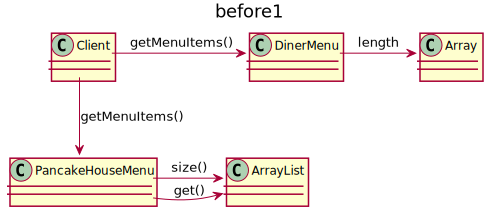

In [5]:
%%plantuml
@startuml
title before1
class ArrayList
class Array
Client -down-> PancakeHouseMenu:getMenuItems()
Client -right-> DinerMenu:getMenuItems()
DinerMenu -> Array:length
PancakeHouseMenu -> ArrayList:size()
PancakeHouseMenu -> ArrayList:get()
@enduml

In [ ]:
# %load ./src/headfirst/iterator/dinermerger/before/MenuItem.java
package headfirst.iterator.dinermerger.before;

public class MenuItem {
    String name;
    String description;
    boolean vegetarian;
    double price;
 
    public MenuItem(String n, String d, boolean v, double p) {
        this.name = n;
        this.description = d;
        this.vegetarian = v;
        this.price = p;
    }
    public String getName() {
        return name;
    }
    public String getDescription() {
        return description;
    }
    public double getPrice() {
        return price;
    }
    public boolean isVegetarian() {
        return vegetarian;
    }
    public String toString() {
        return (name + ", $" + price + "\n   " + description);
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/before/DinerMenu.java
package headfirst.iterator.dinermerger.before;

public class DinerMenu {
    static final int MAX_ITEMS = 3;
    int numberOfItems = 0;
    MenuItem[] menuItems;
  
    public DinerMenu() {
        menuItems = new MenuItem[MAX_ITEMS];
        addItem("Vegetarian BLT",
                "(Fakin') Bacon with lettuce & tomato on whole wheat", true, 2.99);
        addItem("BLT",
                "Bacon with lettuce & tomato on whole wheat", false, 2.99);
        addItem("Soup of the day",
                "Soup of the day, with a side of potato salad", false, 3.29);
    }
    public void addItem(String name, String description, boolean vegetarian, double price) {
        MenuItem menuItem = new MenuItem(name, description, vegetarian, price);
        if (numberOfItems >= MAX_ITEMS) {
            System.err.println("Sorry, menu is full!  Can't add item to menu");
        } else {
            menuItems[numberOfItems] = menuItem;
            numberOfItems = numberOfItems + 1;
        }
    }
    public MenuItem[] getMenuItems() {
        return menuItems;
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/before/PancakeHouseMenu.java
package headfirst.iterator.dinermerger.before;

import java.util.ArrayList;

public class PancakeHouseMenu {
    ArrayList menuItems;
 
    public PancakeHouseMenu() {
        menuItems = new ArrayList();
    
        addItem("K&B's Pancake Breakfast", 
                "Pancakes with scrambled eggs, and toast", true, 2.99);
        addItem("Regular Pancake Breakfast", "Pancakes with fried eggs, sausage", false, 2.99);
        addItem("Blueberry Pancakes", "Pancakes made with fresh blueberries", true, 3.49);
        addItem("Waffles", "Waffles, with your choice of blueberries or strawberries", true, 3.59);
    }
    public void addItem(String name, String description, boolean vegetarian, double price) {
        MenuItem menuItem = new MenuItem(name, description, vegetarian, price);
        menuItems.add(menuItem);
    }
    public ArrayList getMenuItems() {
        return menuItems;
    }
    public String toString() {
        return "Objectville Pancake House Menu";
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/before/MenuTestDrive.java
package headfirst.iterator.dinermerger.before;

import java.util.*;

public class MenuTestDrive {
    public static void main(String args[]) {
    PancakeHouseMenu pancakeHouseMenu = new PancakeHouseMenu();
    DinerMenu dinerMenu = new DinerMenu();
 
    printMenu();
    }
    public static void printMenu() {
        PancakeHouseMenu pancakeHouseMenu = new PancakeHouseMenu();
        DinerMenu dinerMenu = new DinerMenu();

        ArrayList breakfastItems = pancakeHouseMenu.getMenuItems();

        for (int i = 0; i < breakfastItems.size(); i++) {
            MenuItem menuItem = (MenuItem)breakfastItems.get(i);
            System.out.print(menuItem.getName());
            System.out.println("\t\t" + menuItem.getPrice());
            System.out.println("\t" + menuItem.getDescription());
        }

        MenuItem[] lunchItems = dinerMenu.getMenuItems();

        for (int i = 0; i < lunchItems.length; i++) {
            MenuItem menuItem = lunchItems[i];
            System.out.print(menuItem.getName());
            System.out.println("\t\t" + menuItem.getPrice());
            System.out.println("\t" + menuItem.getDescription());
        }
    }
}


In [27]:
!javac -d classes/ -sourcepath src/ src/headfirst/iterator/dinermerger/before/*.java
!java -cp classes/ headfirst.iterator.dinermerger.before.MenuTestDrive

Note: src/headfirst/iterator/dinermerger/before/PancakeHouseMenu.java uses unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
K&B's Pancake Breakfast		2.99
	Pancakes with scrambled eggs, and toast
Regular Pancake Breakfast		2.99
	Pancakes with fried eggs, sausage
Blueberry Pancakes		3.49
	Pancakes made with fresh blueberries
Waffles		3.59
	Waffles, with your choice of blueberries or strawberries
Vegetarian BLT		2.99
	(Fakin') Bacon with lettuce & tomato on whole wheat
BLT		2.99
	Bacon with lettuce & tomato on whole wheat
Soup of the day		3.29
	Soup of the day, with a side of potato salad


# 4. 설계

* SR - Single Responsibility (p.339)
    * A class should have **only one** reason to change
    * High Cohesion - 높은 응집성이란 한 가지 목적만 수행하는 것.
    * 서로 다른 기능을 한 클래스에 넣어 놓으면, 한 기능이 바뀔 때 (무관한) 다른 기능도 따라서 변경관리해주어야 하는 번거로움. 
    * Composite 패턴의 경우, iteration을 분리해서 SR
        * decouple iteration from collection
* Iteration
    * next() 다음 항목 가져오기
    * hasNext() 항목이 남아있는지 확인하기 (Null Iterator, p.372)

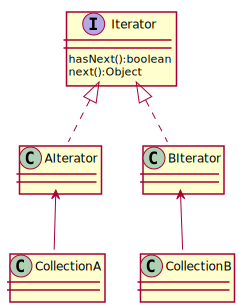

In [14]:
%%plantuml
@startuml
interface Iterator {
    hasNext():boolean
    next():Object
}
Iterator <|.. AIterator
Iterator <|.. BIterator
CollectionB -up-> BIterator
CollectionA -up-> AIterator
@enduml

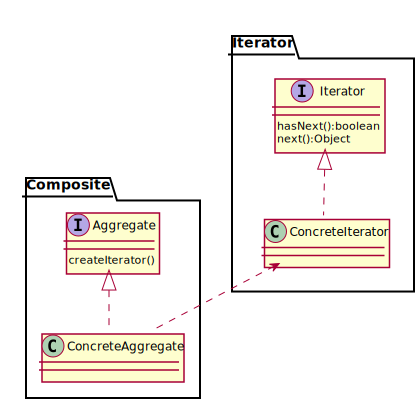

In [65]:
%%plantuml
@startuml
package "Iterator" {
    interface Iterator {
        hasNext():boolean
        next():Object
    }
    Iterator <|.. ConcreteIterator
}
package "Composite" {
    interface Aggregate {
        createIterator()
    }
    Aggregate <|.. ConcreteAggregate
}
ConcreteAggregate .left.> ConcreteIterator
@enduml

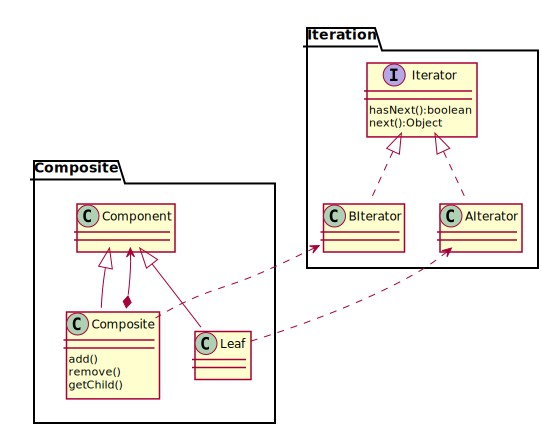

In [9]:
%%plantuml
@startuml
package "Iteration" {
interface Iterator {
    hasNext():boolean
    next():Object
}
Iterator <|.. AIterator
Iterator <|.. BIterator
}
package "Composite" {
class Component
class Leaf
class Composite {
    add()
    remove()
    getChild()
}
Component <|-- Composite
Component <|-- Leaf
Composite *-up-> Component
}
Leaf .left.> AIterator
Composite .left.> BIterator
@enduml

# 5. after

* 교재 HFDP Ch9 'Diner Menu'

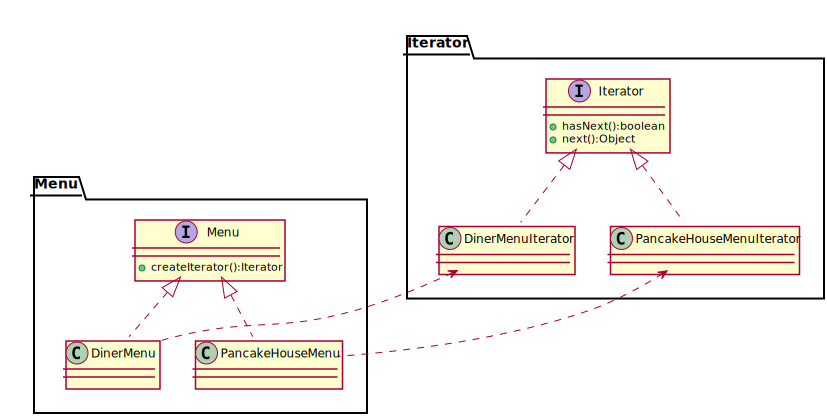

In [66]:
%%plantuml
@startuml
package Iterator {
interface Iterator {
    +hasNext():boolean
    +next():Object
}
Iterator <|.. DinerMenuIterator
Iterator <|.. PancakeHouseMenuIterator
}
package Menu {
interface Menu {
    +createIterator():Iterator
}
Menu <|.. DinerMenu
Menu <|.. PancakeHouseMenu
}
DinerMenu .left.> DinerMenuIterator
PancakeHouseMenu .left.> PancakeHouseMenuIterator
@enduml

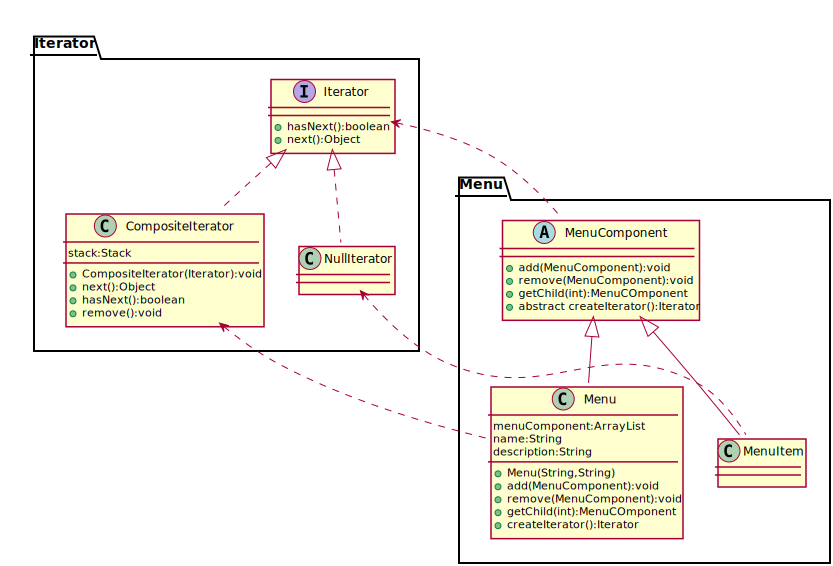

In [55]:
%%plantuml
@startuml
package Iterator {
    interface Iterator {
        +hasNext():boolean
        +next():Object
    }
    class CompositeIterator {
        stack:Stack
        +CompositeIterator(Iterator):void
        +next():Object
        +hasNext():boolean
        +remove():void
    }
    Iterator <|.. CompositeIterator
    Iterator <|.. NullIterator
}
package Menu {
    abstract class MenuComponent {
        +add(MenuComponent):void
        +remove(MenuComponent):void
        +getChild(int):MenuCOmponent
        +abstract createIterator():Iterator
    }
    class Menu {
        menuComponent:ArrayList
        name:String
        description:String
        +Menu(String,String)
        +add(MenuComponent):void
        +remove(MenuComponent):void
        +getChild(int):MenuCOmponent
        +createIterator():Iterator
    }
    MenuComponent <|-- Menu
    MenuComponent <|-- MenuItem
}
Iterator <.. MenuComponent
CompositeIterator <.. Menu
NullIterator <.. MenuItem
@enduml

# 6. Case Implementation


* Menu
* Menu Composite


## 6.1. Menu

* PancakeHouseMenu는 ArrayList
* DinerMenu는 MenuItem[]


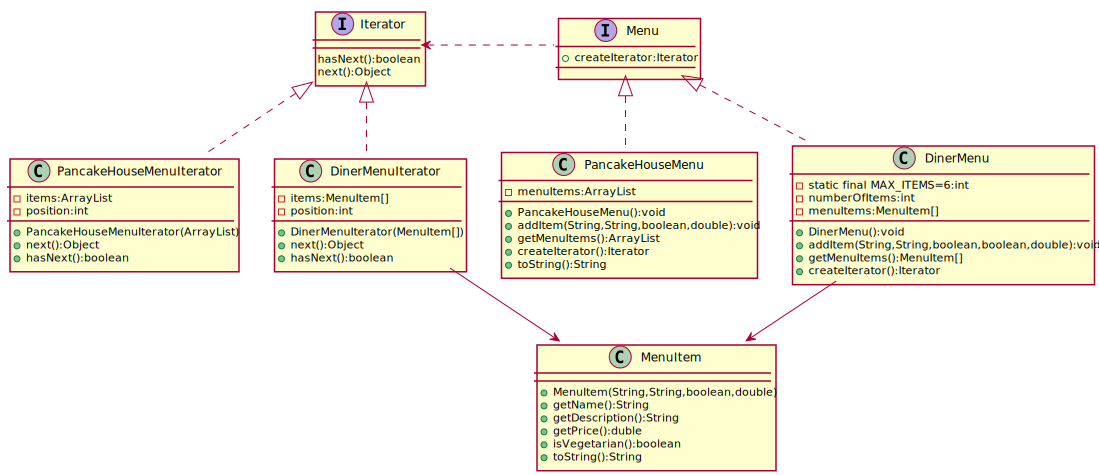

In [11]:
%%plantuml
@startuml
interface Iterator {
    hasNext():boolean
    next():Object
}
interface Menu {
    +createIterator:Iterator
}
class PancakeHouseMenuIterator {
    -items:ArrayList
    -position:int
    +PancakeHouseMenuIterator(ArrayList)
    +next():Object
    +hasNext():boolean
}
class PancakeHouseMenu {
    -menuItems:ArrayList
    +PancakeHouseMenu():void
    +addItem(String,String,boolean,double):void
    +getMenuItems():ArrayList
    +createIterator():Iterator
    +toString():String
}
class MenuItem {
    +MenuItem(String,String,boolean,double)
    +getName():String
    +getDescription():String
    +getPrice():duble
    +isVegetarian():boolean
    +toString():String
}
class DinerMenuIterator {
    -items:MenuItem[]
    -position:int
    +DinerMenuIterator(MenuItem[])
    +next():Object
    +hasNext():boolean
}
class DinerMenu {
    -static final MAX_ITEMS=6:int
    -numberOfItems:int
    -menuItems:MenuItem[]
    +DinerMenu():void
    +addItem(String,String,boolean,boolean,double):void
    +getMenuItems():MenuItem[]
    +createIterator():Iterator
    '+toString():String
}
Menu .left.> Iterator
Menu <|.. PancakeHouseMenu
Iterator <|.. PancakeHouseMenuIterator
Menu <|.. DinerMenu
Iterator <|.. DinerMenuIterator
DinerMenu --> MenuItem
DinerMenuIterator --> MenuItem
@enduml

In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/Iterator.java
package headfirst.iterator.dinermerger.after;

public interface Iterator {
    boolean hasNext();
    Object next();
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/DinerMenuIterator.java
package headfirst.iterator.dinermerger.after;

public class DinerMenuIterator implements Iterator {
    MenuItem[] items;
    int position = 0;

    public DinerMenuIterator(MenuItem[] items) {
        this.items = items;
    }
 
    public Object next() {
        MenuItem menuItem = items[position];
        position = position + 1;
        return menuItem;
    }
    public boolean hasNext() {
        if (position >= items.length || items[position] == null) {
            return false;
        } else {
            return true;
        }
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/MenuItem.java
package headfirst.iterator.dinermerger.after;

public class MenuItem {
    String name;
    String description;
    boolean vegetarian; //jsl20151122: used in isVegetarian() and for waitress to order
    double price;
 
    public MenuItem(String name, String description, boolean vegetarian, double price) {
        this.name = name;
        this.description = description;
        this.vegetarian = vegetarian;
        this.price = price;
    }
    public String getName() {
        return name;
    }
    public String getDescription() {
        return description;
    }
    public double getPrice() {
        return price;
    }
    public String toString() {
        return (name + ", $" + price + "\n   " + description);
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/PancakeHouseMenuIterator.java
package headfirst.iterator.dinermerger.after;

import java.util.ArrayList;

public class PancakeHouseMenuIterator implements Iterator {
    ArrayList items;
    int position = 0;
    public PancakeHouseMenuIterator(ArrayList items) {
        this.items = items;
    }
    public Object next() {
        Object object = items.get(position);
        position = position + 1;
        return object;
    }
    public boolean hasNext() {
        if (position >= items.size()) {
            return false;
        } else {
            return true;
        }
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/Menu.java
package headfirst.iterator.dinermerger.after;

public interface Menu {
    public Iterator createIterator();
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/DinerMenu.java
package headfirst.iterator.dinermerger.after;

public class DinerMenu implements Menu {
    static final int MAX_ITEMS = 6;
    int numberOfItems = 0;
    MenuItem[] menuItems;
  
    public DinerMenu() {
        menuItems = new MenuItem[MAX_ITEMS];
 
        addItem("Vegetarian BLT",
                "(Fakin') Bacon with lettuce & tomato on whole wheat", true, 2.99);
        addItem("BLT",
                "Bacon with lettuce & tomato on whole wheat", false, 2.99);
        addItem("Soup of the day",
                "Soup of the day, with a side of potato salad", false, 3.29);
        addItem("Hotdog",
                "A hot dog, with saurkraut, relish, onions, topped with cheese", false, 3.05);
        addItem("Steamed Veggies and Brown Rice",
                "Steamed vegetables over brown rice", true, 3.99);
        addItem("Pasta",
                "Spaghetti with Marinara Sauce, and a slice of sourdough bread", true, 3.89);
	}
    public void addItem(String n, String d, boolean v, double p) {
        MenuItem menuItem = new MenuItem(n, d, v, p);
        if (numberOfItems >= MAX_ITEMS) {
            System.err.println("Sorry, menu is full!  Can't add item to menu");
        } else {
            menuItems[numberOfItems] = menuItem;
            numberOfItems = numberOfItems + 1;
        }
    }
    public MenuItem[] getMenuItems() {
        return menuItems;
    }
    public Iterator createIterator() {
        return new DinerMenuIterator(menuItems);
    }
    // other menu methods here
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/PancakeHouseMenu.java
package headfirst.iterator.dinermerger.after;

import java.util.ArrayList;

public class PancakeHouseMenu implements Menu {
    ArrayList menuItems;
 
    public PancakeHouseMenu() {
        menuItems = new ArrayList();
    
        addItem("K&B's Pancake Breakfast", 
                "Pancakes with scrambled eggs, and toast", true, 2.99);
        addItem("Regular Pancake Breakfast", 
                "Pancakes with fried eggs, sausage", false, 2.99);
        addItem("Blueberry Pancakes",
                "Pancakes made with fresh blueberries", true, 3.49);
        addItem("Waffles",
                "Waffles, with your choice of blueberries or strawberries", true, 3.59);
    }
    public void addItem(String name, String description, boolean vegetarian, double price) {
        MenuItem menuItem = new MenuItem(name, description, vegetarian, price);
        menuItems.add(menuItem);
    }
    public ArrayList getMenuItems() {
        return menuItems;
    }
    public Iterator createIterator() {
        return new PancakeHouseMenuIterator(menuItems);
    }
    public String toString() {
        return "Objectville Pancake House Menu";
    }
    // other menu methods here
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/Waitress.java
package headfirst.iterator.dinermerger.after;

public class Waitress {
    PancakeHouseMenu pancakeHouseMenu;
    DinerMenu dinerMenu;
 
    public Waitress(PancakeHouseMenu pancakeHouseMenu, DinerMenu dinerMenu) {
        this.pancakeHouseMenu = pancakeHouseMenu;
        this.dinerMenu = dinerMenu;
    }
    public void printMenu() {
        Iterator pancakeIterator = pancakeHouseMenu.createIterator();
        Iterator dinerIterator = dinerMenu.createIterator();

        System.out.println("MENU\n----\nBREAKFAST");
        printMenu(pancakeIterator);
        System.out.println("\nLUNCH");
        printMenu(dinerIterator);
    }
    private void printMenu(Iterator iterator) {
        while (iterator.hasNext()) {
            MenuItem menuItem = (MenuItem)iterator.next();
            System.out.print(menuItem.getName() + ", ");
            System.out.print(menuItem.getPrice() + " -- ");
            System.out.println(menuItem.getDescription());
        }
    }
}


In [ ]:
# %load ./src/headfirst/iterator/dinermerger/after/MenuTestDrive.java
package headfirst.iterator.dinermerger.after;

import java.util.*;

public class MenuTestDrive {
    public static void main(String args[]) {
        PancakeHouseMenu pancakeHouseMenu = new PancakeHouseMenu();
        DinerMenu dinerMenu = new DinerMenu();
 
        Waitress waitress = new Waitress(pancakeHouseMenu, dinerMenu);

        waitress.printMenu();
    }
}


In [53]:
!javac -d classes/ -sourcepath src/ src/headfirst/iterator/dinermerger/after/*.java
!java -cp classes/ headfirst.iterator.dinermerger.after.MenuTestDrive

Note: src/headfirst/iterator/dinermerger/after/PancakeHouseMenu.java uses unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
MENU
----
BREAKFAST
K&B's Pancake Breakfast, 2.99 -- Pancakes with scrambled eggs, and toast
Regular Pancake Breakfast, 2.99 -- Pancakes with fried eggs, sausage
Blueberry Pancakes, 3.49 -- Pancakes made with fresh blueberries
Waffles, 3.59 -- Waffles, with your choice of blueberries or strawberries

LUNCH
Vegetarian BLT, 2.99 -- (Fakin') Bacon with lettuce & tomato on whole wheat
BLT, 2.99 -- Bacon with lettuce & tomato on whole wheat
Soup of the day, 3.29 -- Soup of the day, with a side of potato salad
Hotdog, 3.05 -- A hot dog, with saurkraut, relish, onions, topped with cheese
Steamed Veggies and Brown Rice, 3.99 -- Steamed vegetables over brown rice
Pasta, 3.89 -- Spaghetti with Marinara Sauce, and a slice of sourdough bread


## 6.2 Menu Composite

* Menu Composite Iterator - Stack
    * java.util.Vector 상속
    * peek() - pop하지 않고 조회만 함.
    * Iterable 구현
* UnsupportedOperationException

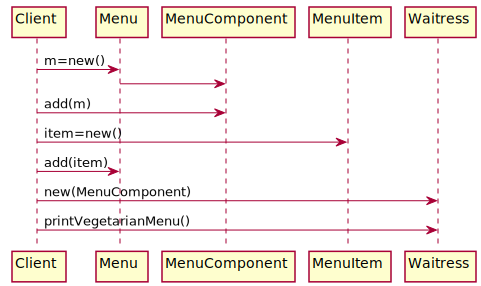

In [11]:
%%plantuml
@startuml
Client -> Menu:m=new()
Menu -> MenuComponent
Client -> MenuComponent:add(m)
Client -> MenuItem:item=new()
Client -> Menu:add(item)
Client -> Waitress:new(MenuComponent)
Client -> Waitress:printVegetarianMenu()
@enduml

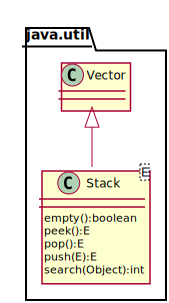

In [15]:
%%plantuml
@startuml
'E: Element (no difference between E and T (Type))'
class java.util.Stack<E> {
    empty():boolean
    peek():E
    pop():E
    push(E):E
    search(Object):int
}
java.util.Vector <|-- java.util.Stack
@enduml

In [ ]:
# %load ./src/headfirst/composite/menuiterator/MenuComponent.java
package headfirst.composite.menuiterator;

import java.util.*;

public abstract class MenuComponent {
    public void add(MenuComponent menuComponent) {
        throw new UnsupportedOperationException();
    }
    public void remove(MenuComponent menuComponent) {
        throw new UnsupportedOperationException();
    }
    public MenuComponent getChild(int i) {
        throw new UnsupportedOperationException();
    }
    public String getName() {
        throw new UnsupportedOperationException();
    }
    public String getDescription() {
        throw new UnsupportedOperationException();
    }
    public double getPrice() {
        throw new UnsupportedOperationException();
    }
    public boolean isVegetarian() {
        throw new UnsupportedOperationException();
    }
    public abstract Iterator createIterator();
    public void print() {
        throw new UnsupportedOperationException();
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/Menu.java
package headfirst.composite.menuiterator;

import java.util.Iterator;
import java.util.ArrayList;

public class Menu extends MenuComponent {
    ArrayList menuComponents = new ArrayList();
    String name;
    String description;
  
    public Menu(String name, String description) {
        this.name = name;
        this.description = description;
    }
    public void add(MenuComponent menuComponent) {
        menuComponents.add(menuComponent);
    }
    public void remove(MenuComponent menuComponent) {
        menuComponents.remove(menuComponent);
    }
    public MenuComponent getChild(int i) {
        return (MenuComponent)menuComponents.get(i);
    }
    public String getName() {
        return name;
    }
    public String getDescription() {
        return description;
    }
    public Iterator createIterator() {
        return new CompositeIterator(menuComponents.iterator());
    }
    public void print() {
        System.out.print("\n" + getName());
        System.out.println(", " + getDescription());
        System.out.println("---------------------");
  
        Iterator iterator = menuComponents.iterator();
        while (iterator.hasNext()) {
            MenuComponent menuComponent = (MenuComponent)iterator.next();
            menuComponent.print();
        }
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/MenuItem.java
package headfirst.composite.menuiterator;

import java.util.Iterator;
import java.util.ArrayList;

public class MenuItem extends MenuComponent {
    String name;
    String description;
    boolean vegetarian;
    double price;

    public MenuItem(String n, String d, boolean v, double p) { 
    	this.name = n;
    	this.description = d;
    	this.vegetarian = v;
    	this.price = p;
    }
    public String getName() {
    	return name;
    }
    public String getDescription() {
    	return description;
    }
    public double getPrice() {
    	return price;
    }
    public boolean isVegetarian() {
    	return vegetarian;
    }
    public Iterator createIterator() {
    	return new NullIterator();
    }
    public void print() {
    	System.out.print("  " + getName());
    	if (isVegetarian()) {
            System.out.print("(v)");
    	}
    	System.out.println(", " + getPrice());
    	System.out.println("     -- " + getDescription());
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/CompositeIterator.java
package headfirst.composite.menuiterator;

import java.util.*;
  
public class CompositeIterator implements Iterator {
    Stack stack = new Stack();
    public CompositeIterator(Iterator iterator) {
    	stack.push(iterator);
    }
    public Object next() {
    	if (hasNext()) {
    		Iterator iterator = (Iterator) stack.peek();
    		MenuComponent component = (MenuComponent) iterator.next();
    		if (component instanceof Menu) {
    			stack.push(component.createIterator());
    		} 
    		return component;
    	} else {
    		return null;
    	}
    }
    public boolean hasNext() {
    	if (stack.empty()) {
    		return false;
    	} else {
    		Iterator iterator = (Iterator) stack.peek();
    		if (!iterator.hasNext()) {
    			stack.pop();
    			return hasNext();
    		} else {
    			return true;
    		}
    	}
    }
    public void remove() {
    	throw new UnsupportedOperationException();
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/NullIterator.java
package headfirst.composite.menuiterator;
 
import java.util.Iterator;
  
public class NullIterator implements Iterator {
    public Object next() {
        return null;
    }
    public boolean hasNext() {
        return false;
    }
    public void remove() {
        throw new UnsupportedOperationException();
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/Waitress.java
package headfirst.composite.menuiterator;

import java.util.Iterator;
  
public class Waitress {
    MenuComponent allMenus;
    public Waitress(MenuComponent allMenus) {
        this.allMenus = allMenus;
    }
    public void printMenu() {
        allMenus.print();
    }
    public void printVegetarianMenu() {
        Iterator iterator = allMenus.createIterator();

        System.out.println("\nVEGETARIAN MENU\n----");
        while (iterator.hasNext()) {
            MenuComponent menuComponent = (MenuComponent)iterator.next();
            try {
                if (menuComponent.isVegetarian()) {
                    menuComponent.print();
                }
            } catch (UnsupportedOperationException e) {}
        }
    }
}


In [ ]:
# %load ./src/headfirst/composite/menuiterator/MenuTestDrive.java
package headfirst.composite.menuiterator;

import java.util.*;

public class MenuTestDrive {
    public static void main(String args[]) {

    	MenuComponent pancakeHouseMenu = new Menu("PANCAKE HOUSE MENU", "Breakfast");
    	MenuComponent dinerMenu = new Menu("DINER MENU", "Lunch");
    	MenuComponent cafeMenu = new Menu("CAFE MENU", "Dinner");
    	MenuComponent dessertMenu = new Menu("DESSERT MENU", "Dessert of course!");
    	MenuComponent allMenus = new Menu("ALL MENUS", "All menus combined");

    	allMenus.add(pancakeHouseMenu);
    	allMenus.add(dinerMenu);
    	allMenus.add(cafeMenu);

    	pancakeHouseMenu.add(new MenuItem("K&B's Pancake Breakfast", 
            "Pancakes with scrambled eggs, and toast", true, 2.99));
    	pancakeHouseMenu.add(new MenuItem("Regular Pancake Breakfast", 
            "Pancakes with fried eggs, sausage", false, 2.99));
    	pancakeHouseMenu.add(new MenuItem("Blueberry Pancakes",
            "Pancakes made with fresh blueberries, and blueberry syrup", true, 3.49));
    	pancakeHouseMenu.add(new MenuItem("Waffles",
            "Waffles, with your choice of blueberries or strawberries", true, 3.59));
    	dinerMenu.add(new MenuItem("Vegetarian BLT",
            "(Fakin') Bacon with lettuce & tomato on whole wheat", true, 2.99));
    	dinerMenu.add(new MenuItem("BLT",
            "Bacon with lettuce & tomato on whole wheat", false, 2.99));
    	dinerMenu.add(new MenuItem("Soup of the day",
            "A bowl of the soup of the day, with a side of potato salad", false, 3.29));
    	dinerMenu.add(new MenuItem("Hotdog",
            "A hot dog, with saurkraut, relish, onions, topped with cheese", false, 3.05));
    	dinerMenu.add(new MenuItem("Steamed Veggies and Brown Rice",
            "A medly of steamed vegetables over brown rice", true, 3.99));
    	dinerMenu.add(new MenuItem("Pasta",
            "Spaghetti with Marinara Sauce, and a slice of sourdough bread", true, 3.89));
    	dinerMenu.add(dessertMenu);
    	dessertMenu.add(new MenuItem("Apple Pie",
            "Apple pie with a flakey crust, topped with vanilla icecream", true, 1.59));
    	dessertMenu.add(new MenuItem("Cheesecake",
            "Creamy New York cheesecake, with a chocolate graham crust", true, 1.99));
    	dessertMenu.add(new MenuItem("Sorbet",
            "A scoop of raspberry and a scoop of lime", true, 1.89));
    	cafeMenu.add(new MenuItem("Veggie Burger and Air Fries",
            "Veggie burger on a whole wheat bun, lettuce, tomato, and fries", true, 3.99));
    	cafeMenu.add(new MenuItem("Soup of the day",
            "A cup of the soup of the day, with a side salad", false, 3.69));
    	cafeMenu.add(new MenuItem("Burrito",
            "A large burrito, with whole pinto beans, salsa, guacamole", true, 4.29));

    	Waitress waitress = new Waitress(allMenus);
    	waitress.printVegetarianMenu();
    }
}


In [63]:
!javac -d classes/ -sourcepath src/ src/headfirst/composite/menuiterator/*.java
!java -cp classes/ headfirst.composite.menuiterator.MenuTestDrive

Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.

VEGETARIAN MENU
----
  K&B's Pancake Breakfast(v), 2.99
     -- Pancakes with scrambled eggs, and toast
  Blueberry Pancakes(v), 3.49
     -- Pancakes made with fresh blueberries, and blueberry syrup
  Waffles(v), 3.59
     -- Waffles, with your choice of blueberries or strawberries
  Vegetarian BLT(v), 2.99
     -- (Fakin') Bacon with lettuce & tomato on whole wheat
  Steamed Veggies and Brown Rice(v), 3.99
     -- A medly of steamed vegetables over brown rice
  Pasta(v), 3.89
     -- Spaghetti with Marinara Sauce, and a slice of sourdough bread
  Apple Pie(v), 1.59
     -- Apple pie with a flakey crust, topped with vanilla icecream
  Cheesecake(v), 1.99
     -- Creamy New York cheesecake, with a chocolate graham crust
  Sorbet(v), 1.89
     -- A scoop of raspberry and a scoop of lime
  Apple Pie(v), 1.59
     -- Apple pie with a flakey crust, topped with vanilla icecream
  C